There are 13,580 listing posted from '2016-03-12' to '2017-09-23' to show propety on sale in Melbourn. My aim is to find the factor affecting properties price.

Questions are 1. Why the property price drop in July? 2. Which factor may affect properties price.


In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import geopandas

In [2]:
# defaut setting
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df_melb = pd.read_csv('melb_data.csv')

In [4]:
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [5]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df_melb.isnull().sum().sort_values(ascending = False) # 4 variables have null value

In [ ]:
df_melb.describe(include = 'object')

In [ ]:
df_melb.describe()

In [ ]:
df_melb.duplicated().sum() # 0 duplicate value.

## Dataset summary

1. Total records are 13,580 and 21 variables. No duplicate records.
2. In Column Building Area（NA：6450）and Year Built（NA：5375）, null value almost reach the half, I will not use them. 
3. Total 8 Regions and almost 1/3 records in Southern Metropolitan.
4. In 33 CouncilAreas, Moreland has the most listing(1163).
5. There were most records(359) in Reservoir among 314 Suburbs.
6. The most popular type is 3 rooms with 3 bedrooms and 2 bathrooms.
7. The most popular land size is 440 square meter. 
8. The median price is AUS Dollar 900,000.
9. 20 bedrooms and 433014 would be outliers.
10. 202 properties were relist under different sales or different date.

## Overview 

In [6]:
df_melb['Number'] = df_melb.index

In [7]:
df_melb['Year'] = df_melb['Date'].apply(lambda x:x[-4:]) # insert column year
df_melb['Month'] = df_melb['Date'].apply(lambda x: x[-7:-5]) # insert column month
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0,2016,12
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,1,2016,02


In [8]:
df_melb_2016 = df_melb[df_melb['Year'] == '2016']
df_melb_2017 = df_melb[df_melb['Year'] == '2017']


In [9]:
df_2016_count = df_melb_2016['Type'].value_counts()
df_2017_count = df_melb_2017['Type'].value_counts()
df_2016_total = df_melb_2016['Type'].count()
df_2017_total = df_melb_2017['Type'].count()
labels  =['House','Unit','Townhouse']

In [11]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, '7244 Properties on Sale in 2017')

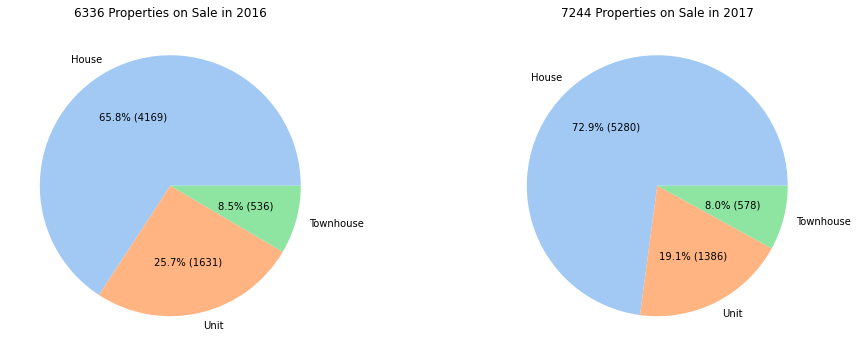

In [13]:
# Property count by year.
colors = sns.color_palette('pastel')[0:3]
f = plt.figure(figsize = (16,6))
f1 = f.add_subplot(1,2,1)
#plt.pie(df_2016_count, labels = labels, colors = colors, autopct= "%d%%")
plt.pie(df_2016_count, labels = labels, colors = colors, autopct= make_autopct(df_2016_count))
plt.title('%d Properties on Sale in 2016' %df_2016_total)


f2 = f.add_subplot(1,2,2)
#plt.pie(df_2017_count, labels = labels, colors = colors, autopct= "%d%%")
plt.pie(df_2017_count, labels = labels, colors = colors, autopct= make_autopct(df_2017_count))
plt.title('%d Properties on Sale in 2017' %df_2017_total)

There were 6336 and 7244 properties on sale in 2016 and 2017 respectively. Among them, the number of house dominated the most. 

In [31]:
df_melb_2016_count = df_melb_2016.groupby(['Month','Type'])['Number'].count().reset_index()
df_melb_2017_count = df_melb_2017.groupby(['Month','Type'])['Number'].count().reset_index()

[Text(0.5, 1.0, 'The number of property by month in 2017')]

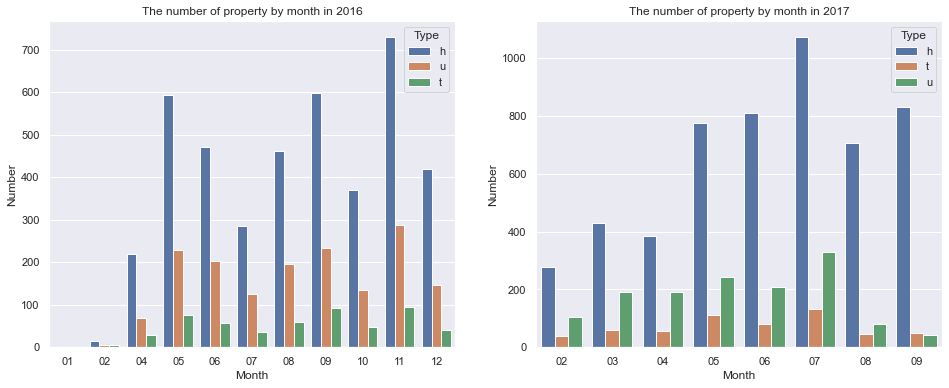

In [32]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

sns.barplot(x='Month',y='Number',hue = 'Type',data =df_melb_2016_count,ax=axs[0]).set(title='The number of property by month in 2016')
sns.barplot(x='Month',y='Number',hue = 'Type',data =df_melb_2017_count,ax=axs[1]).set(title='The number of property by month in 2017')

Two plots show the distribution of median price of different type of propety by month in 2016 and 2017.

In [14]:
df_melb_h = df_melb[df_melb['Type'] == 'h']
df_melb_other = df_melb.drop(df_melb[df_melb['Type'] == 'h'].index)

[Text(0.5, 1.0, 'The distribution of Townhouse and unit price')]

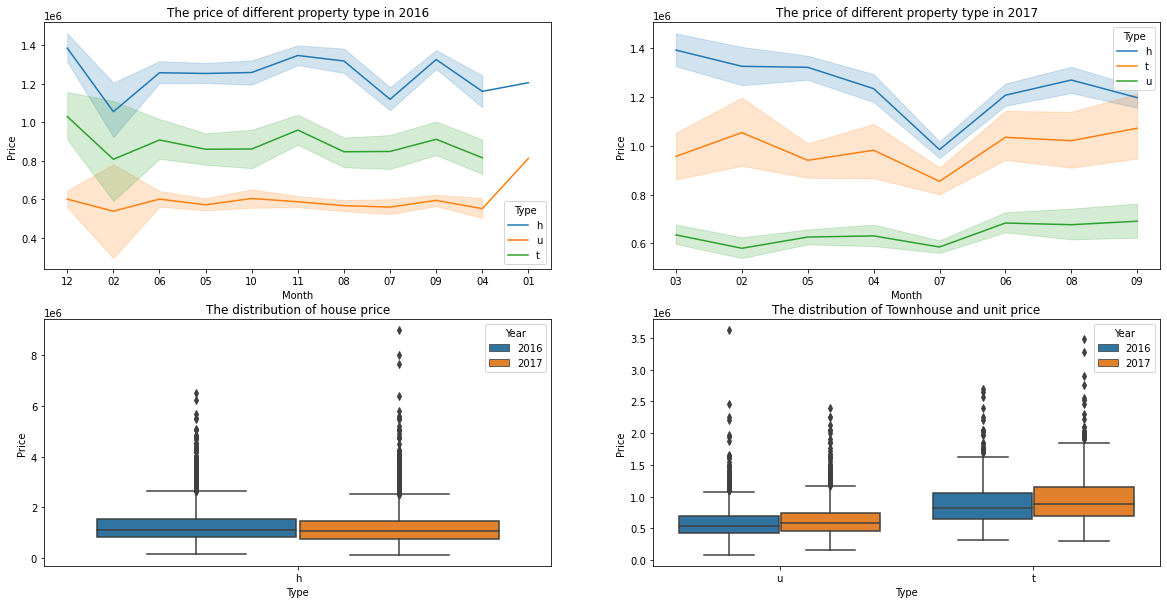

In [15]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,10))
sns.lineplot(x='Month',y='Price',hue='Type',data = df_melb_2016,ax=axs[0,0]).set(title = 'The price of different property type in 2016')
sns.lineplot(x='Month',y='Price',hue='Type',data = df_melb_2017,ax=axs[0,1]).set(title = 'The price of different property type in 2017')
sns.boxplot(x = 'Type',y='Price',hue='Year',data=df_melb_h,ax=axs[1,0]).set(title='The distribution of house price')
sns.boxplot(x= 'Type',y='Price',hue='Year',data=df_melb_other,ax=axs[1,1]).set(title='The distribution of Townhouse and unit price')

These plots show that the distribution of property price of different type including house,townhouse and unit.We can see the median price of the house is the higest and the median price of unit is the lowest. In addition, the meidian price of unit and townhouse in 2017 went up,compared that in 2016.

In [16]:
df_melb[df_melb['Address'] == '36 Aberfeldie St']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month
4125,Moonee Ponds,36 Aberfeldie St,3,h,1725000.0,PI,Nelson,24/09/2016,6.9,3039.0,3.0,2.0,3.0,596.0,203.0,1950.0,Moonee Valley,-37.76090,144.90500,Western Metropolitan,6232.0,4125,2016,09
9240,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,3/06/2017,6.2,3039.0,3.0,2.0,2.0,596.0,203.0,1950.0,Moonee Valley,-37.76086,144.90497,Western Metropolitan,6232.0,9240,2017,06
9634,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,17/06/2017,6.2,3039.0,3.0,2.0,2.0,596.0,203.0,1950.0,Moonee Valley,-37.76086,144.90497,Western Metropolitan,6232.0,9634,2017,06


Deeply going through a particular address, we can verify the statement that median price of house went up in 2017.

In [17]:
df_melb_suburb = df_melb.groupby(['Regionname','CouncilArea','Suburb'])['Price'].median().reset_index()
df_suburb_price = df_melb_suburb.sort_values(by='Price',ascending = False)

df_melb_regionname = df_melb.groupby(['Regionname'])['Price'].median().reset_index()
df_region_price = df_melb_regionname.sort_values(by='Price',ascending = False)

df_melb_council = df_melb.groupby(['CouncilArea'])['Price'].median().reset_index()[:8]
df_council_price = df_melb_council.sort_values(by='Price',ascending = False)


[Text(0.5, 1.0, 'The median Property Price in CouncilArea')]

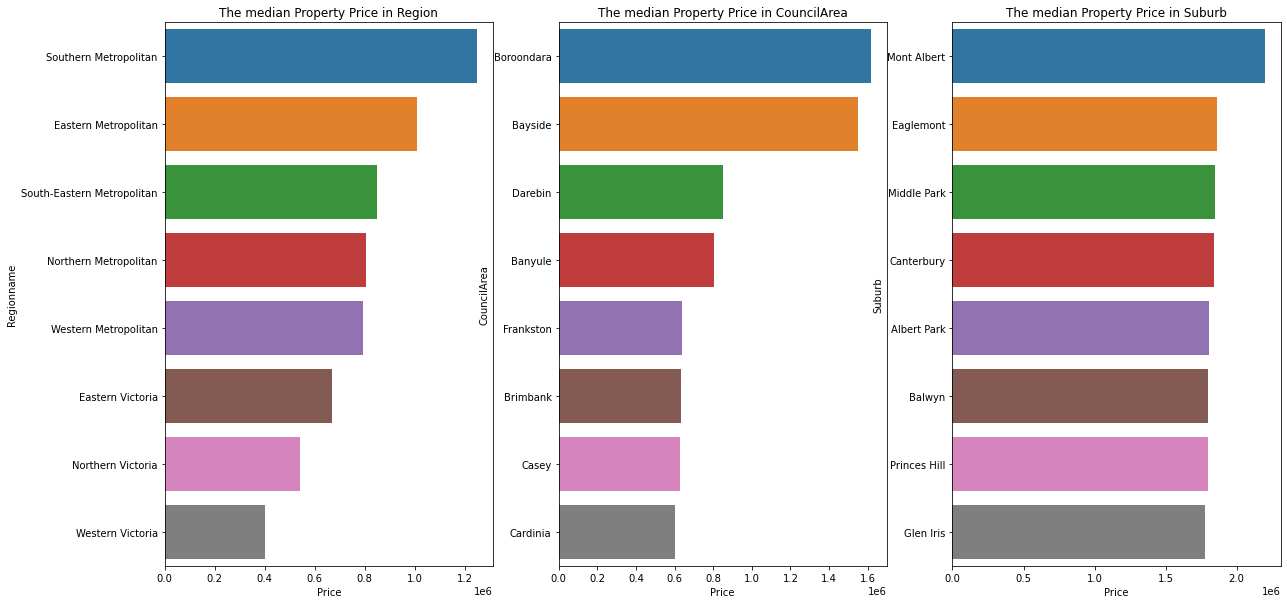

In [18]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
sns.barplot(x='Price',y='Suburb',data=df_suburb_price[:8],ax=axs[2]).set(title='The median Property Price in Suburb')
sns.barplot(x='Price',y='Regionname',data=df_region_price,ax=axs[0]).set(title='The median Property Price in Region')
sns.barplot(x='Price',y='CouncilArea',data=df_council_price,ax=axs[1]).set(title='The median Property Price in CouncilArea')

The above plots presents the top 8 Region/Council area/ suburb of the highest meidan price of property. Southern Metropolitan topped the median property price in all regions. Boroondara had the first place of median property price among council areas. and the median property price in Mont Albert far more than that of the second.

In [19]:
melb = geopandas.read_file("suburb-10-vic.geojson")
melb

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: dlopen(/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/fiona/ogrext.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libpoppler.91.dylib
  Referenced from: /Users/jessica/opt/anaconda3/lib/libgdal.30.dylib
  Reason: tried: '/Users/jessica/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/fiona/../../../libpoppler.91.dylib' (no such file), '/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/fiona/../../../libpoppler.91.dylib' (no such file), '/Users/jessica/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/Users/jessica/opt/anaconda3/bin/../lib/libpoppler.91.dylib' (no such file), '/Users/jessica/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/Users/jessica/opt/anaconda3/bin/../lib/libpoppler.91.dylib' (no such file), '/usr/local/lib/libpoppler.91.dylib' (no such file), '/usr/lib/libpoppler.91.dylib' (no such file)
Importing pyogrio resulted in: No module named 'pyogrio'

## Analysis data

[Text(0.5, 1.0, 'Median Property price by month')]

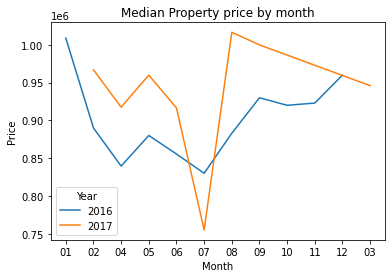

In [23]:
MedianP_month = df_melb.groupby(['Year','Month'])['Price'].median().reset_index()
sns.lineplot(x='Month',y='Price',hue = 'Year',data = MedianP_month).set(title='Median Property price by month')

From the above figure, we can find that the lowerst median property price were both in July.

In [24]:
df_melb.groupby(['Year'])['Number'].count() # 2016:6336 2017: 7244

Year
2016    6336
2017    7244
Name: Number, dtype: int64

In [26]:
count_by_month = df_melb.groupby(['Year','Month'])['Number'].count().reset_index()
count_by_month

,Year,Month,Number
0,2016,01,2
1,2016,02,26
2,2016,04,318
3,2016,05,899
4,2016,06,732
5,2016,07,446
6,2016,08,716
7,2016,09,925
8,2016,10,551
9,2016,11,1114


In [27]:
sns.set_theme(style = 'darkgrid')

[Text(0.5, 1.0, 'Records number by month')]

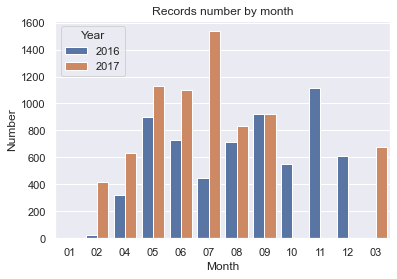

In [28]:
sns.barplot(x='Month',y='Number',hue = 'Year', data = count_by_month).set(title = 'Records number by month')

The number of property listing were nearly lowest in 2016.

In [36]:
df_201607 = df_melb_2016[(df_melb_2016['Month'] == '07')] # 446  Select Records in July of 2016

df_2016_u = df_melb_2016[df_melb_2016['Type'] == 'u']

In [37]:
df_201607_type_count = df_201607['Type'].value_counts()# number of different type of houses in July of 2016

df_201607_type_total = df_201607['Type'].count()

labels  =['House','Unit','Townhouse']


In [38]:
df_u_month = df_2016_u.groupby(['Month'])['Number'].count().reset_index()
df_u_total = df_melb_2016.groupby(['Month'])['Number'].count().reset_index()
df_u_month['Ratio'] = df_u_month['Number'] / df_u_total['Number']
df_u_month = df_u_month.drop(index = 0)

[Text(0.5, 1.0, 'Unit proportion in 2016 ')]

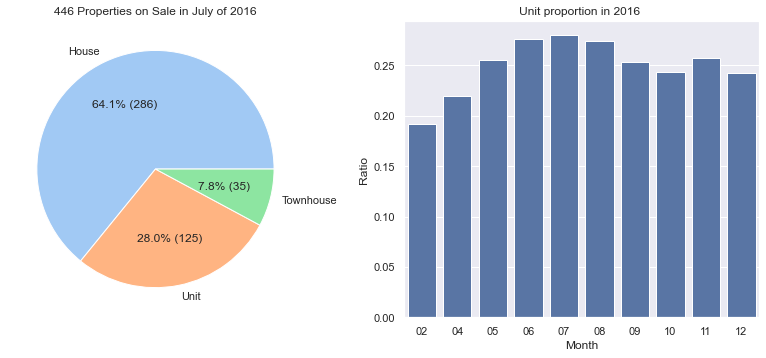

In [39]:
colors = sns.color_palette('pastel')[0:3]
f = plt.figure(figsize = (14,12))
f1 = f.add_subplot(2,2,1)
plt.pie(df_201607_type_count, labels = labels, colors = colors, autopct= make_autopct(df_201607_type_count))
plt.title('%d Properties on Sale in July of 2016' %df_201607_type_total)


f2 = f.add_subplot(2,2,2)
sns.barplot(x='Month',y='Ratio',data = df_u_month,color='b').set(title = 'Unit proportion in 2016 ')

Q: 1. Why the property price drop in July?

In July,2016,property number went down to the lowerst, but the the ratio of unit number were the most among the whole 2016. Since the median price of unit ranked the lowest compared to the median price of house or townhouse. 
Maybe this is one of the reason that lowest property price occured in July.

And I failed to find the pattern between price and landsize or yearbuilt or distance even longitude. 

<AxesSubplot:xlabel='Distance'>

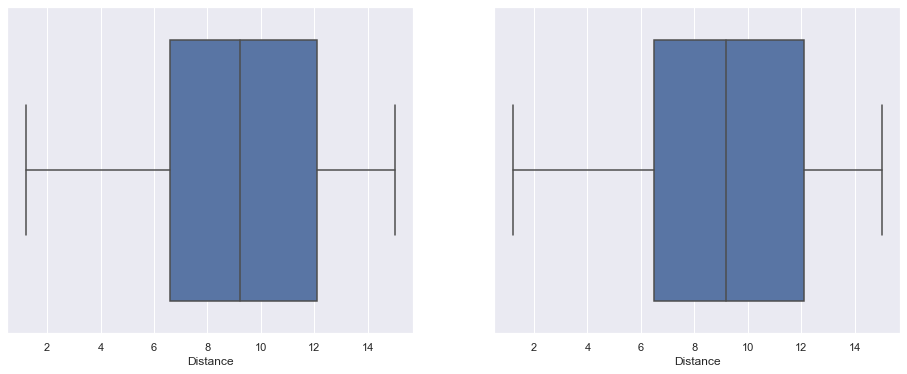

In [41]:

df_201607_h = df_melb_2016[(df_melb_2016['Month']=='07')&(df_melb_2016['Type']=='h')]
df_201607_h = df_201607_h[df_201607_h['Price']<2000000]


fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,6))


df_test = df_201607_h[df_201607_h['Distance']<20]
df_filter = df_melb_2016[(df_melb_2016['Price']<2000000)&(df_melb_2016['Distance']<20) & (df_melb_2016['Type']=='h')]
sns.boxplot(x=df_test['Distance'],ax=axs[0])
sns.boxplot(x=df_filter['Distance'],ax=axs[1])

#df_test = df_201607_h['Suburb'].value_counts().sort_values(ascending = False)
#df_test.head(20)
#df_201607_h_region_total = df_201607_h['Regionname'].count()

#labels  =['Western Metropolitan','Northern Metropolitan','Southern Metropolitan','Eastern Metropolitan','South-Eastern Metropolitan']

## The factor affecting the property price

#### Price VS distance

[Text(0.5, 1.0, 'The distribution of Distance')]

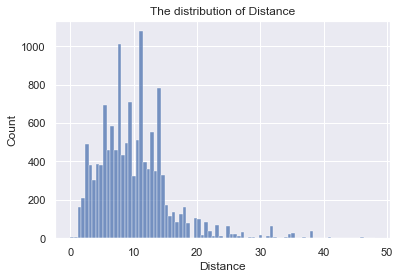

In [45]:
sns.histplot(data=df_melb,x='Distance').set(title='The distribution of Distance')

[Text(0.5, 1.0, 'distance > 20')]

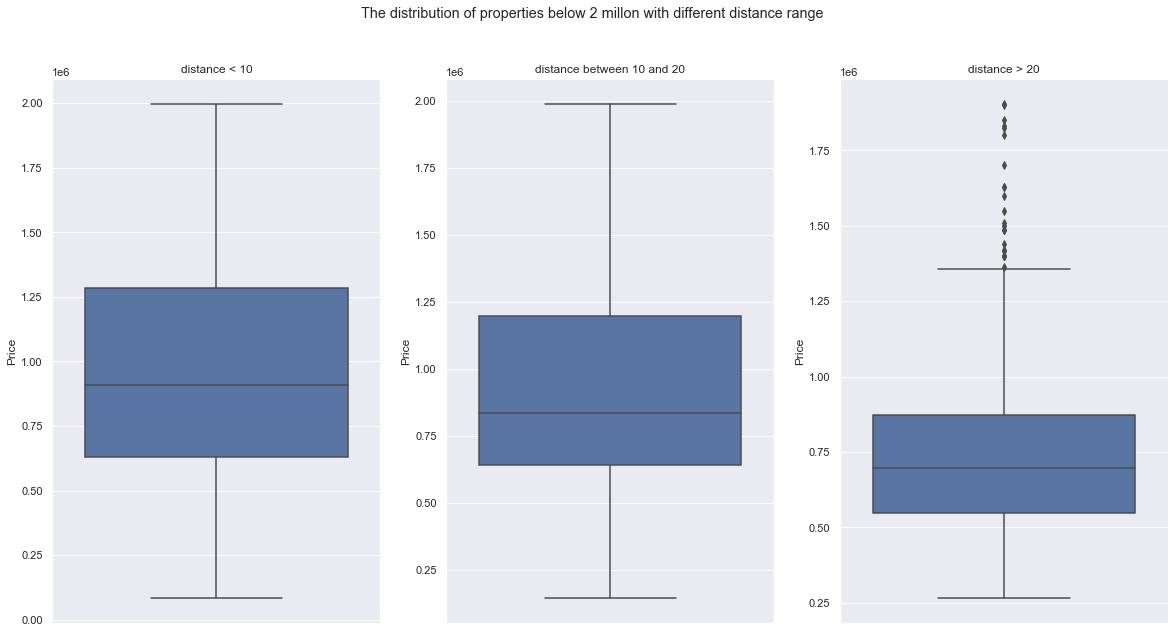

In [46]:
df_melb_filter = df_melb[df_melb['Price'] < 2000000]
df_close = df_melb_filter[df_melb_filter['Distance'] < 10] # 2212
df_center =  df_melb_filter[( df_melb_filter['Distance'] > 9.99) & (df_melb['Distance'] < 20)] # 5097
df_far =  df_melb_filter[ df_melb_filter['Distance'] > 19.99] # 6246

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
fig.suptitle("The distribution of properties below 2 millon with different distance range")
sns.boxplot(y=df_close['Price'],ax=axs[0]).set(title='distance < 10')
sns.boxplot(y=df_center['Price'],ax=axs[1]).set(title='distance between 10 and 20')
sns.boxplot(y=df_far['Price'],ax=axs[2]).set(title='distance > 20')

The boxplot shows that the median price went down with larger distance.

#### Price VS Landsize

[Text(0.5, 1.0, 'The distribution of Landsize')]

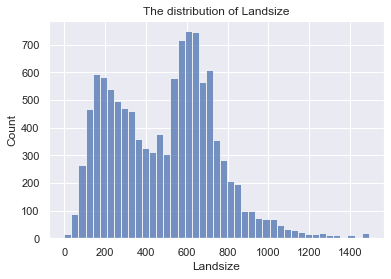

In [47]:
df_landsize_filter = df_melb[(df_melb['Landsize']<1500)&(df_melb['Landsize']>0)]
sns.histplot(x='Landsize',data=df_landsize_filter).set(title='The distribution of Landsize')

[Text(0.5, 1.0, 'Landsize > 600')]

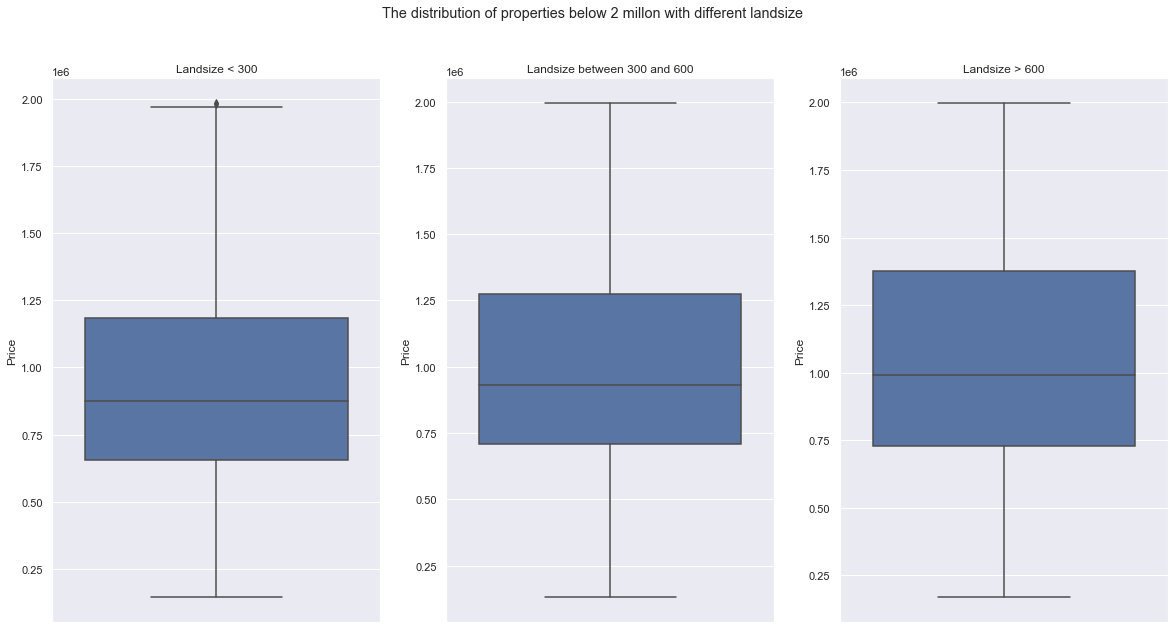

In [48]:
df_landsize_filter = df_landsize_filter[df_landsize_filter['Price']<2000000]
df_land_small = df_landsize_filter[df_landsize_filter['Landsize']<300]
df_land_middle = df_landsize_filter[(df_landsize_filter['Landsize']>299) & (df_landsize_filter['Landsize']<600)]
df_land_large = df_landsize_filter[df_landsize_filter['Landsize']>599]

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
fig.suptitle("The distribution of properties below 2 millon with different landsize")
sns.boxplot(y=df_land_small['Price'],ax=axs[0]).set(title='Landsize < 300')
sns.boxplot(y=df_land_middle['Price'],ax=axs[1]).set(title='Landsize between 300 and 600')
sns.boxplot(y=df_land_large['Price'],ax=axs[2]).set(title='Landsize > 600')

As to those properties that price below 2 million and the landsize smaller than 1,500 square meter, the price of property increase when the land size become bigger.

#### Price VS Property Type

[Text(0.5, 1.0, 'In 2017')]

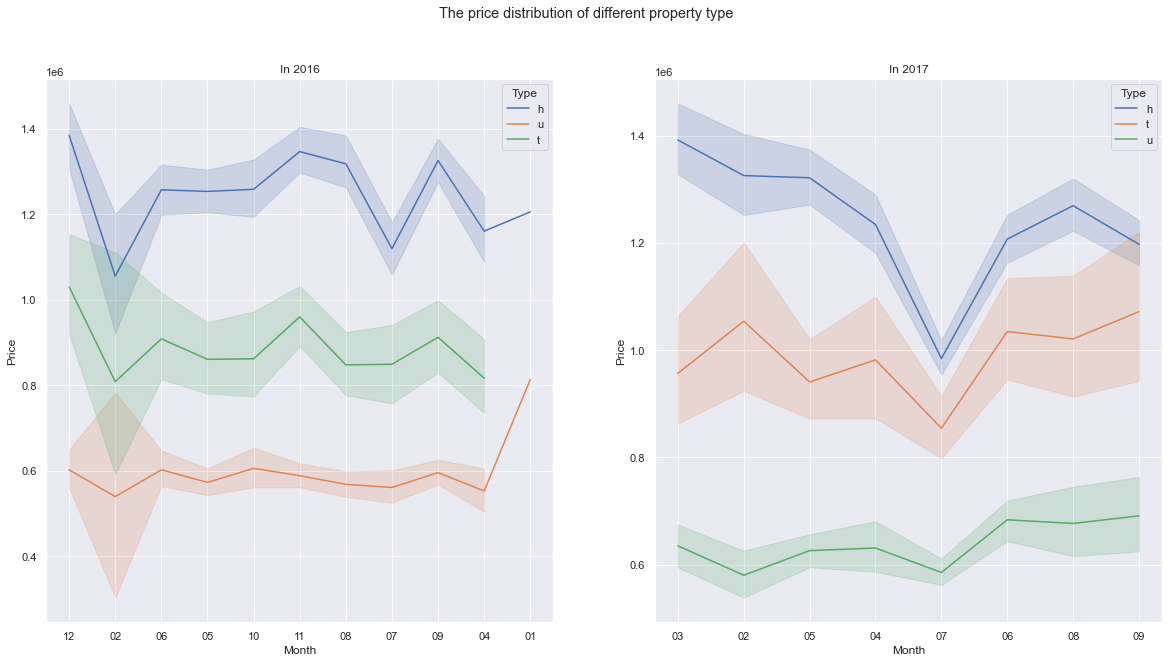

In [49]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
plt.suptitle("The price distribution of different property type")
sns.lineplot(x='Month',y='Price',hue='Type',data = df_melb_2016,ax=axs[0]).set(title = 'In 2016')
sns.lineplot(x='Month',y='Price',hue='Type',data = df_melb_2017,ax=axs[1]).set(title = 'In 2017')

Among three property type including house, townhouse and unit, the unit always had the lowest median price, but the house were the higest.

#### Price VS Room

[Text(0.5, 1.0, 'distance > 20')]

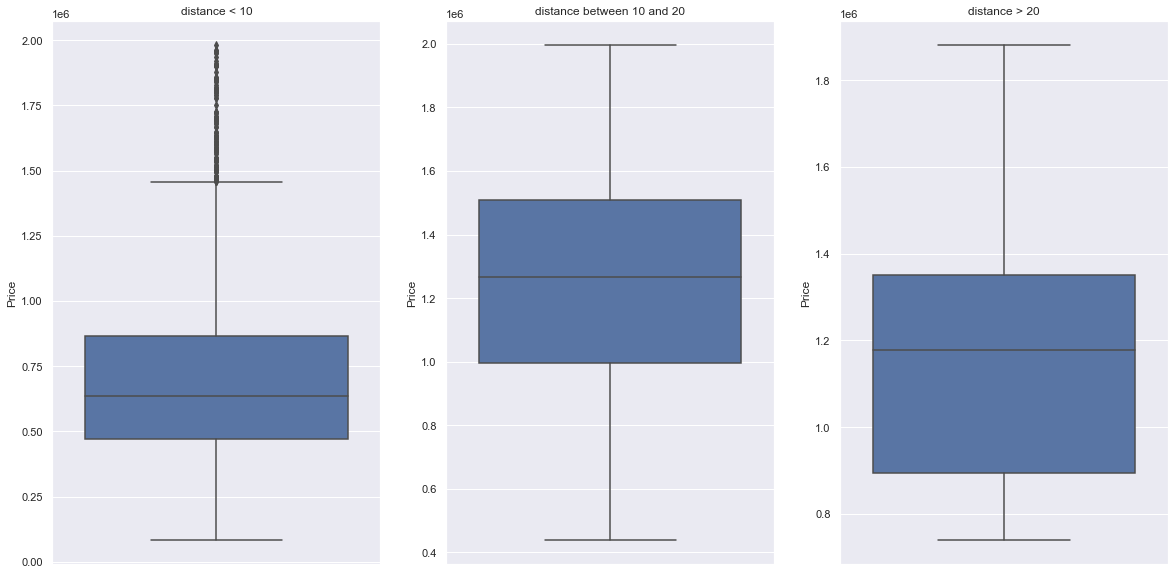

In [51]:
df_melb_filter = df_melb[df_melb['Price'] < 2000000]
df_small = df_melb_filter[df_melb_filter['Rooms'] < 3] # 2212
df_middle =  df_melb_filter[( df_melb_filter['Rooms'] > 2) & (df_melb['Distance'] < 7)] # 5097
df_large =  df_melb_filter[ df_melb_filter['Rooms'] >6 ] # 6246

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
#fig.suptitle("The distribution of properties below 2 millon with different distance range")
sns.boxplot(y=df_small['Price'],ax=axs[0]).set(title='distance < 10')
sns.boxplot(y=df_middle['Price'],ax=axs[1]).set(title='distance between 10 and 20')
sns.boxplot(y=df_large['Price'],ax=axs[2]).set(title='distance > 20')

3-6 Rooms would have the comparative price.

In [ ]:
result = np.corrcoef(df_melb['Price'],df_melb['Bathroom'])
result

In [ ]:
df_filter = df_melb[['Suburb','Price','Distance','Rooms','Regionname','Month']]
sns.pairplot(df_filter)
plt.show()